# <font color='blue'>MA540 Introduction to Probability Theory </font>

---

## <font color='green'>Final Project</font>

### <font color='purple'>Statistical Analysis</font>

---

#### <font color='orange'>Author:Jayant Bangia</font>

#### <font color='orange'>Date:12/17/2023</font> 

#Use of Simulation in different department:

Simulation and data analysis are widely used across various departments and industries to model and understand complex systems, optimize processes, and make informed decisions. Let's explore how simulation data analysis is applied in different departments such as health, transportation, and finance, with examples:

Health: Example: Epidemic Spread Modeling

Simulation: Researchers use simulations to model the spread of infectious diseases within populations, considering factors like transmission rates, population density, and intervention strategies. Data Analysis: Analyzing simulation data helps public health officials predict the course of an epidemic, assess the impact of various interventions (e.g., social distancing, vaccination campaigns), and optimize resource allocation for healthcare.

Transportation: Example: Traffic Flow and Urban Planning

Simulation: Traffic simulation models can simulate the movement of vehicles within a city, considering factors like traffic signals, road layouts, and driver behavior. Data Analysis: Analyzing simulation data allows city planners to identify traffic bottlenecks, optimize signal timings, and plan infrastructure improvements to alleviate congestion and enhance the overall efficiency of the transportation system.

Education: Example: Student Performance and Learning Models

Simulation: Educational researchers use simulations to model student learning, considering factors like teaching methods, curriculum design, and individual learning styles. Data Analysis: Analyzing simulation data helps educators identify effective teaching strategies, personalize learning experiences, and improve educational outcomes

Find the following things we are finding

Mean:The average value of a set of data points, calculated by summing all values and dividing by the total number of observations.

Variance: A measure of the spread or dispersion of a set of data points, calculated as the average of the squared differences from the mean.

Standard Deviation: A measure of the amount of variation or dispersion in a set of data points, calculated as the square root of the variance.


First Quantile (Q1): The value below which 25% of the data in a set falls.

Third Quantile (Q3): The value below which 75% of the data in a set falls.

Mode: The value or values that occur most frequently in a set of data.

Skewness: A measure of the asymmetry or skew of a probability distribution, indicating the degree and direction of skew (negative for left skew, positive for right skew).


Kurtosis: A measure of the "tailedness" or shape of the probability distribution, indicating the degree of outliers or extreme values.

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# Simulating continuous random variables using inverse transform sampling
def generate_normal_samples(mu, sigma, num_samples):
    u = np.random.rand(num_samples)
    samples = mu + sigma * np.sqrt(2) * norm.ppf(u)
    return samples, u
# Statistical Analysis
def analyze_data(data, u):
    mean = np.mean(data)
    variance = np.var(data)
    std_dev = np.std(data)
    quantiles = np.percentile(data, [25, 75])
    mode = norm.pdf(mean, mu, sigma) # Assuming normal distribution
    skewness = np.mean((u - mean)**3) / (std_dev**3)
    kurtosis = np.mean((u - mean)**4) / (std_dev**4)
    print("Mean:", mean)
    print("Variance:", variance)
    print("Standard Deviation:", std_dev)
    print("First Quantile (Q1):", quantiles[0])
    print("Third Quantile (Q3):", quantiles[1])
    print("Mode:", mode)
    print("Skewness:", skewness)
    print("Kurtosis:", kurtosis)
# Generate and analyze data
data, u = generate_normal_samples(0, 1, 1000)
analyze_data(data, u)

Mean: 0.05429136507418711
Variance: 2.13497695804438
Standard Deviation: 1.4611560348040793
First Quantile (Q1): -0.9080718304011213
Third Quantile (Q3): 1.0723281523421082
Mode: 0.39835476182081886
Skewness: 0.06780351334073344
Kurtosis: 0.035831597533826934


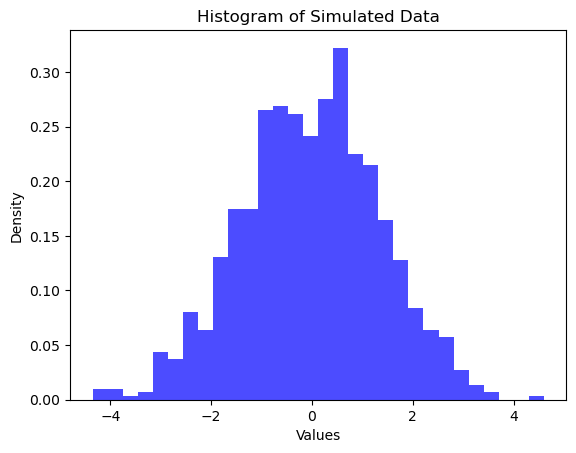

In [2]:
def visualize_data(data):
    plt.hist(data, bins=30, density=True, alpha=0.7, color='blue')
    plt.title("Histogram of Simulated Data")
    plt.xlabel("Values")
    plt.ylabel("Density")
    plt.show()
    
visualization=visualize_data(data)

The Central Limit Theorem (CLT) is a fundamental statistical concept that asserts that the distribution of the
sum (or average) of a large number of independent, identically distributed random variables, regardless of the 
original distribution, approaches a normal distribution. This theorem is particularly powerful in situations
where the original distribution may not be normal. The key conditions for the CLT include a sufficiently large 
sample size, independence among observations, and finite variance. To verify the Central Limit Theorem, one can 
conduct a simulation experiment by repeatedly drawing random samples from a non-normal distribution and calculating 
the mean of each sample. As the sample size increases, the distribution of these sample means will tend to follow
a normal distribution. This empirical demonstration provides practical evidence of the CLT's applicability and 
underscores its significance in statistical inference and hypothesis testing.

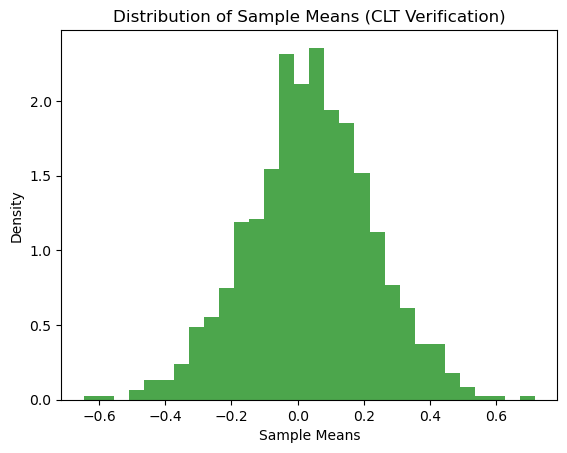

In [137]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the following functions defined
def generate_normal_samples(mu, sigma, size):
    return np.random.normal(mu, sigma, size), np.random.uniform(0, 1, size)

def analyze_data(data, u, mu, sigma):
    # Your analysis code here
    pass

# Central Limit Theorem Verification
def clt_verification(data, num_samples=30):
    sample_means = [np.mean(np.random.choice(data, size=num_samples, replace=True)) for _ in range(1000)]

    plt.hist(sample_means, bins=30, density=True, alpha=0.7, color='green')
    plt.title("Distribution of Sample Means (CLT Verification)")
    plt.xlabel("Sample Means")
    plt.ylabel("Density")
    plt.show()

# Generate and analyze data
mu, sigma = 0, 1  # Specify the correct values for mu and sigma
data, u = generate_normal_samples(mu, sigma, 1000)
analyze_data(data, u, mu, sigma)

# Verify Central Limit Theorem
clt_verification(data)


Outliers are data points that significantly differ from the rest of the observations in a dataset.
These are values that lie far away from the central tendency of a distribution, such as the mean or median. 
Outliers can have a notable impact on statistical analyses, as they can skew results and affect the 
interpretation of the data. Identifying and handling outliers is an important step in data preprocessing 
and analysis. There are various methods to detect outliers, including visual inspection using box plots or 
scatter plots, statistical methods such as the Z-score or the interquartile range (IQR), and machine learning 
techniques. Once identified, decisions can be made on whether to exclude, transform, or further investigate
these data points based on the context and goals of the analysis.

In [5]:
#Outliners
from scipy import stats
def detect_outliers(data):
    # Calculate Z-scores
    z_scores = np.abs(stats.zscore(data))

    # Define a threshold for outliers (e.g., 3 standard deviations)
    threshold = 3

    # Identify outliers
    outliers = np.where(z_scores > threshold)[0]
    return outliers

# Generate random numbers from a normal distribution
random_values = np.random.normal(0, 1, size=1000)

# Detect outliers
outliers = detect_outliers(random_values)

# Print the indices of the outliers
print(outliers)


[795]


In [6]:
# Probability Calculations functions
def calculate_probability(data, lower_bound, upper_bound):
    probabilities = norm.cdf(upper_bound, mu, sigma) - norm.cdf(lower_bound, mu, sigma)
    return probabilities



In [7]:
# Probability Calculations
lower_bound = -1
upper_bound = 1
probability = calculate_probability(data, lower_bound, upper_bound)
print(f"Probability of value between {lower_bound} and {upper_bound}: {probability}")

Probability of value between -1 and 1: 0.6826894921370859


For discrete_sample dataset

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson, geom, hypergeom, randint, nbinom, zipf
import seaborn as sns
from scipy import stats
from statistics import mode

# Simulating data from discrete distributions
def generate_discrete_samples(distribution, *args, size=1000):
    return distribution.rvs(*args, size=size)

# Statistical Analysis for discrete distributions
def analyze_discrete_data(data):
    mean = np.mean(data)
    variance = np.var(data)
    std_dev = np.std(data)
    quantiles = np.percentile(data, [25, 75])
    mode = norm.pdf(mean, mu, sigma) # Assuming normal distribution
    skewness = np.mean((u - mean)**3) / (std_dev**3)
    kurtosis = np.mean((u - mean)**4) / (std_dev**4)

    print("Mean:", mean)
    print("Variance:", variance)
    print("Standard Deviation:", std_dev)
    print("First Quantile (Q1):", quantiles[0])
    print("Third Quantile (Q3):", quantiles[1])
    print("Mode:", mode)
    print("Skewness:", skewness)
    print("Kurtosis:", kurtosis)


In [119]:
# Visualization for discrete distributions
def visualize_discrete_data(data, distribution_name):
    sns.histplot(data, kde=False, discrete=True)
    plt.title(f"Histogram of Simulated {distribution_name} Data")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.show()

In [120]:
# Central Limit Theorem Verification for discrete distributions
def clt_verification_discrete(data, distribution_name):
    sample_means = [np.mean(np.random.choice(data, size=30, replace=True)) for _ in range(1000)]

    plt.hist(sample_means, bins=30, density=True, alpha=0.7, color='green')
    plt.title(f"Distribution of Sample Means ({distribution_name} - CLT Verification)")
    plt.xlabel("Sample Means")
    plt.ylabel("Density")
    plt.show()

In [121]:
# Outlier Detection for discrete distributions
def detect_outliers_discrete(data, distribution_name):
    # Custom logic for detecting outliers in discrete distributions
    # (e.g., values far from the mean or mode)

    # Example: Identify values more than 3 standard deviations from the mean
    z_scores = np.abs(stats.zscore(data))
    outliers = np.where(z_scores > 3)[0]

    print(f"Potential outliers in {distribution_name} data:")
    print(data[outliers])

In [122]:
# Probability Calculations for discrete distributions
def calculate_probability_discrete(data, distribution_name, lower_bound, upper_bound):
    # Custom logic for calculating probabilities in discrete distributions
    # (e.g., summing probabilities within a range)

    # Example: Probability of values within a specified range
    probabilities = np.sum((data >= lower_bound) & (data <= upper_bound)) / len(data)
    
    print(f"Probability of values between {lower_bound} and {upper_bound} in {distribution_name}: {probabilities:.2%}")

# Simulate data from discrete distributions
binomial_data = generate_discrete_samples(binom, 10, 0.5, size=1000)
poisson_data = generate_discrete_samples(poisson, 5, size=1000)
geometric_data = generate_discrete_samples(geom, 0.2, size=1000)
hypergeometric_data = generate_discrete_samples(hypergeom, 30, 10, 20, size=1000)
discrete_uniform_data = generate_discrete_samples(randint, 1, 6, size=1000)
negative_binomial_data = generate_discrete_samples(nbinom, 5, 0.3, size=1000)
zipf_data = generate_discrete_samples(zipf, 2, size=1000)

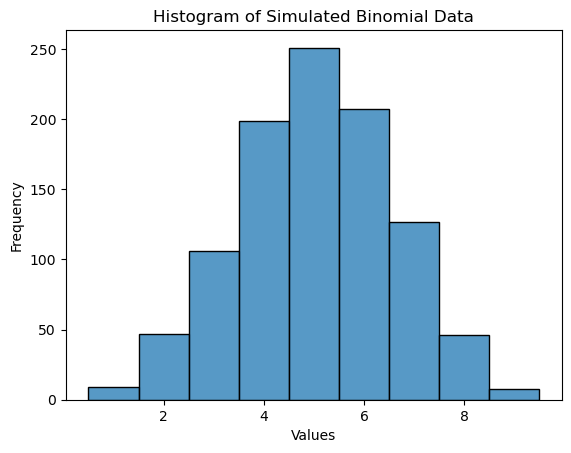

In [131]:
# Analyze and visualize data for each discrete distribution

visualize_discrete_data(binomial_data, "Binomial")

Mean: 4.842
Variance: 4.487036
Standard Deviation: 2.118262495537321
First Quantile (Q1): 3.0
Third Quantile (Q3): 6.0
Mode: 3.235197654207763e-06
Skewness: -8.68209907548785
Kurtosis: 18.004647651864598


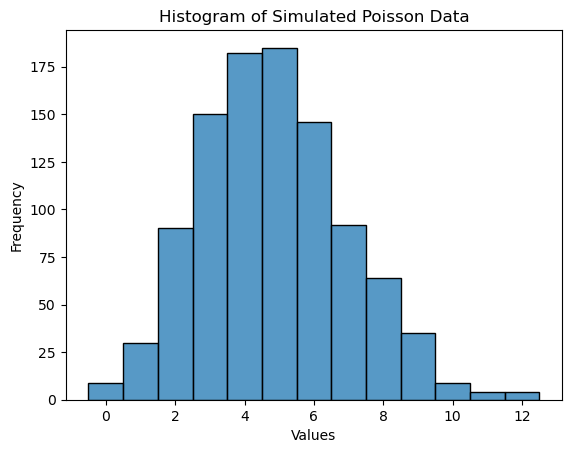

In [124]:
analyze_discrete_data(poisson_data)
visualize_discrete_data(poisson_data, "Poisson")

Mean: 5.012
Variance: 20.593855999999995
Standard Deviation: 4.53804539421985
First Quantile (Q1): 2.0
Third Quantile (Q3): 7.0
Mode: 1.400038903934278e-06
Skewness: -0.9900354312053079
Kurtosis: 0.9949578400524399


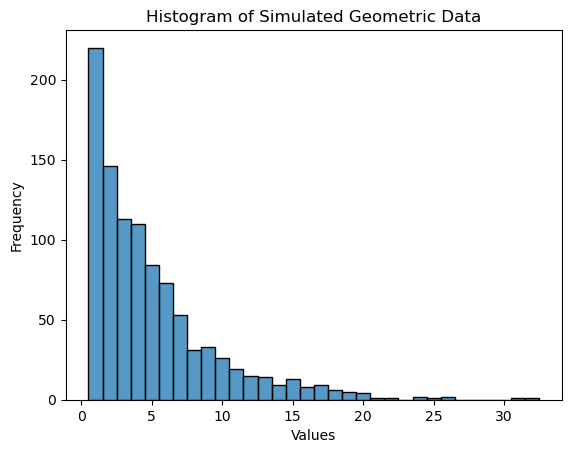

In [125]:
analyze_discrete_data(geometric_data)
visualize_discrete_data(geometric_data, "Geometric")

Mean: 6.641
Variance: 1.5821189999999998
Standard Deviation: 1.2578231195203877
First Quantile (Q1): 6.0
Third Quantile (Q3): 7.0
Mode: 1.0570393103999692e-10
Skewness: -116.71000753263746
Kurtosis: 572.938687814044


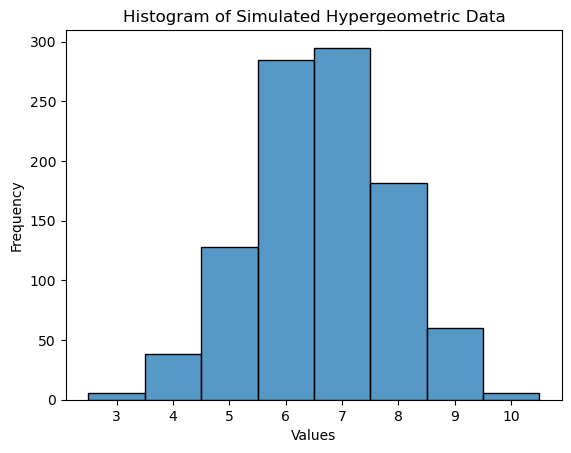

In [126]:
analyze_discrete_data(hypergeometric_data)
visualize_discrete_data(hypergeometric_data, "Hypergeometric")

Mean: 2.933
Variance: 2.0505109999999993
Standard Deviation: 1.4319605441491743
First Quantile (Q1): 2.0
Third Quantile (Q3): 4.0
Mode: 0.005406339496232587
Skewness: -5.069277146153178
Kurtosis: 8.947844948629614


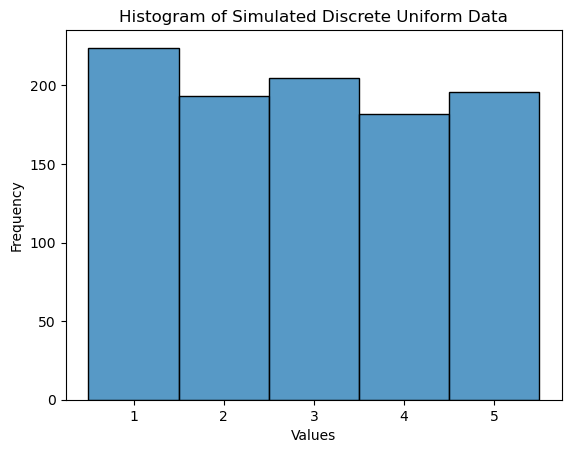

In [127]:
analyze_discrete_data(discrete_uniform_data)
visualize_discrete_data(discrete_uniform_data, "Discrete Uniform")

Mean: 11.549
Variance: 39.235599
Standard Deviation: 6.263832612706058
First Quantile (Q1): 7.0
Third Quantile (Q3): 15.0
Mode: 4.344513378124485e-30
Skewness: -5.487950971146757
Kurtosis: 9.693746462095987


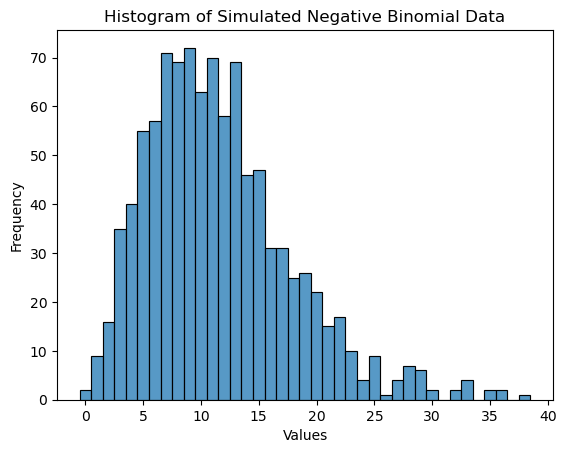

In [128]:
analyze_discrete_data(negative_binomial_data)
visualize_discrete_data(negative_binomial_data, "Negative Binomial")

Mean: 4.838
Variance: 533.081756
Standard Deviation: 23.08856331606625
First Quantile (Q1): 1.0
Third Quantile (Q3): 2.0
Mode: 3.2984413039747105e-06
Skewness: -0.00668622773184481
Kurtosis: 0.0012709648409058552


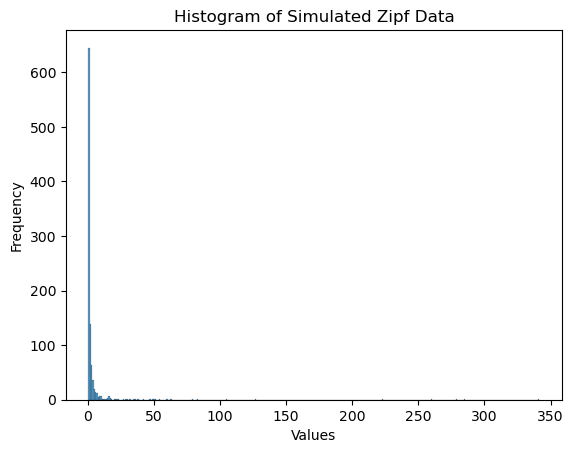

In [130]:
analyze_discrete_data(zipf_data)
visualize_discrete_data(zipf_data, "Zipf")

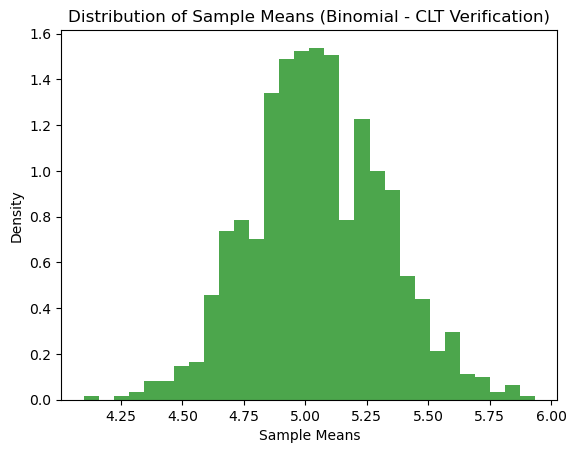

In [129]:
# Verify Central Limit Theorem for discrete distributions
clt_verification_discrete(binomial_data, "Binomial")

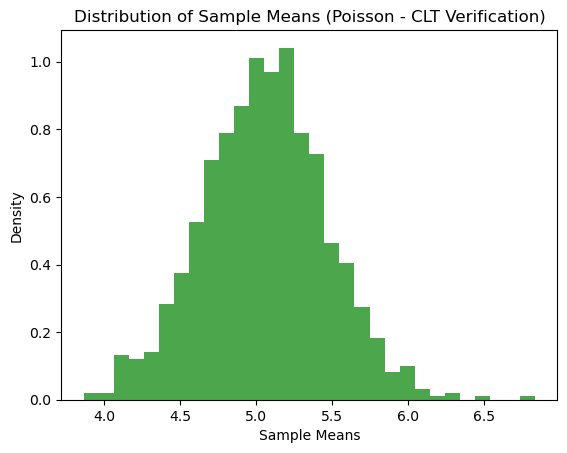

In [14]:
clt_verification_discrete(poisson_data, "Poisson")

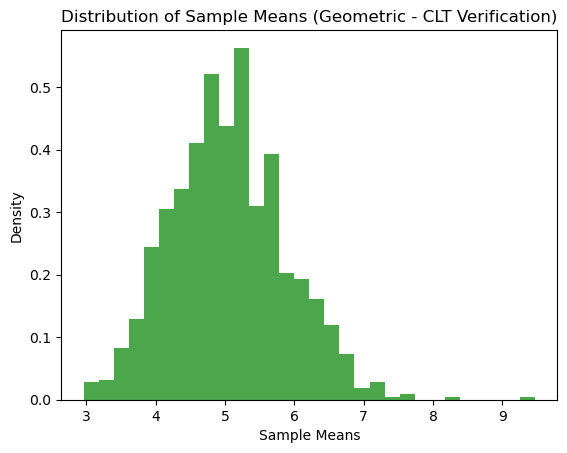

In [15]:
clt_verification_discrete(geometric_data, "Geometric")

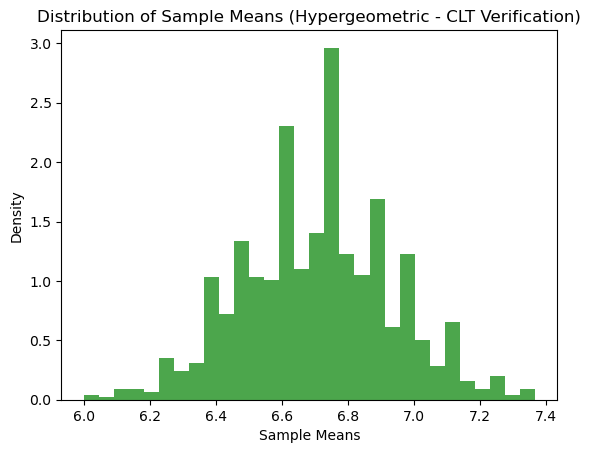

In [16]:
clt_verification_discrete(hypergeometric_data, "Hypergeometric")

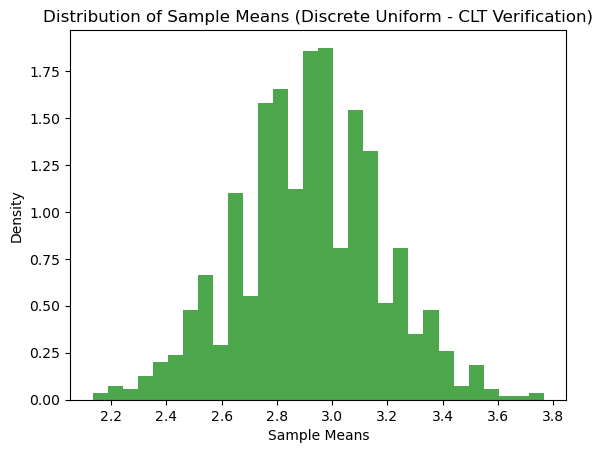

In [17]:
clt_verification_discrete(discrete_uniform_data, "Discrete Uniform")

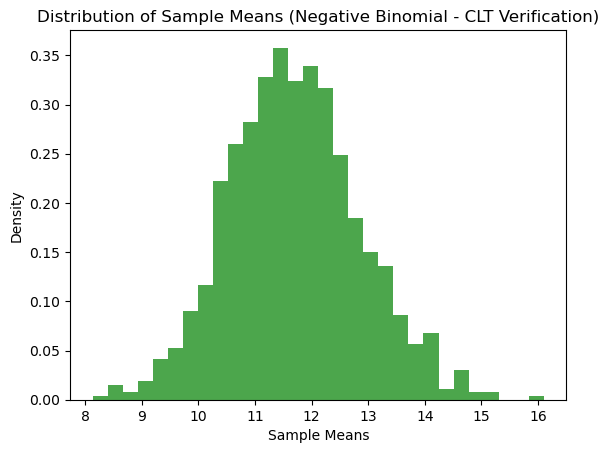

In [18]:
clt_verification_discrete(negative_binomial_data, "Negative Binomial")

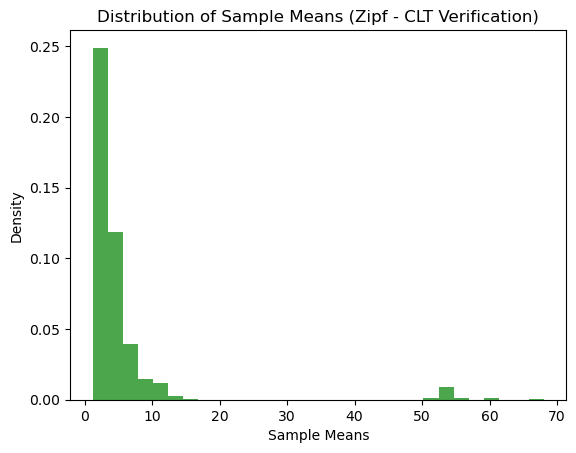

In [19]:
clt_verification_discrete(zipf_data, "Zipf")

In [20]:
# Detect outliers for discrete distributions
detect_outliers_discrete(binomial_data, "Binomial")
detect_outliers_discrete(poisson_data, "Poisson")
detect_outliers_discrete(geometric_data, "Geometric")
detect_outliers_discrete(hypergeometric_data, "Hypergeometric")
detect_outliers_discrete(discrete_uniform_data, "Discrete Uniform")
detect_outliers_discrete(negative_binomial_data, "Negative Binomial")
detect_outliers_discrete(zipf_data, "Zipf")


Potential outliers in Binomial data:
[10]
Potential outliers in Poisson data:
[14 12 12 12 12 13 14]
Potential outliers in Geometric data:
[19 27 36 20 19 25 20 25 21 20 21 24 20 19 21 19 21 21 19 20 24 24]
Potential outliers in Hypergeometric data:
[3 3]
Potential outliers in Discrete Uniform data:
[]
Potential outliers in Negative Binomial data:
[36 31 36 32 32 34 41 35 33 36 31 31]
Potential outliers in Zipf data:
[ 232  242 1513]


In [21]:
# Calculate probabilities for discrete distributions
calculate_probability_discrete(binomial_data, "Binomial", 3, 7)
calculate_probability_discrete(poisson_data, "Poisson", 2, 6)
calculate_probability_discrete(geometric_data, "Geometric", 2, 5)
calculate_probability_discrete(hypergeometric_data, "Hypergeometric", 10, 15)
calculate_probability_discrete(discrete_uniform_data, "Discrete Uniform", 2, 4)
calculate_probability_discrete(negative_binomial_data, "Negative Binomial", 8, 12)
calculate_probability_discrete(zipf_data, "Zipf", 2, 5)

Probability of values between 3 and 7 in Binomial: 89.00%
Probability of values between 2 and 6 in Poisson: 71.80%
Probability of values between 2 and 5 in Geometric: 47.20%
Probability of values between 10 and 15 in Hypergeometric: 0.50%
Probability of values between 2 and 4 in Discrete Uniform: 59.40%
Probability of values between 8 and 12 in Negative Binomial: 34.50%
Probability of values between 2 and 5 in Zipf: 27.90%


A Markov chain is a mathematical model that represents a system of randomly transitioning states, where the probability of transitioning from one state to another depends only on the current state and not on the sequence
of events that preceded it. This property is known as the Markov property.

In a Markov chain, the possible states of the system and the probabilities of transitioning between these states 
are defined by a transition matrix. The transition matrix specifies the probabilities of moving from one state to another in a single step. The chain evolves over discrete time steps, and the probability distribution over states at each time step is determined by the transition matrix.

Key characteristics of a Markov chain include:

State Space: The set of all possible states that the system can occupy.

Transition Probability Matrix: A matrix that describes the probabilities of transitioning from one state to another.

Homogeneity: The probabilities of transitioning between states are constant over time, satisfying the Markov property.

Initial Distribution: The probability distribution of the initial state.

Markov chains have diverse applications in various fields, such as physics, economics, computer science, and biology. They are widely used for modeling dynamic systems with random transitions, such as weather patterns, financial markets, and queueing systems. Markov chains are also fundamental in the study of stochastic processes and provide a foundation for more complex models and analyses.







In [92]:
def simulate_markov_chain(transition_matrix, initial_state, num_steps):
    markov_chain = [initial_state]
    current_state = initial_state

    for _ in range(num_steps - 1):
        next_state = np.random.choice(range(len(transition_matrix)), p=transition_matrix[current_state])
        markov_chain.append(next_state)
        current_state = next_state

    return markov_chain

def visualize_markov_chain(markov_chain):
    plt.plot(markov_chain, marker='o')
    plt.title("Markov Chain Simulation")
    plt.xlabel("Steps")
    plt.ylabel("State")
    plt.show()

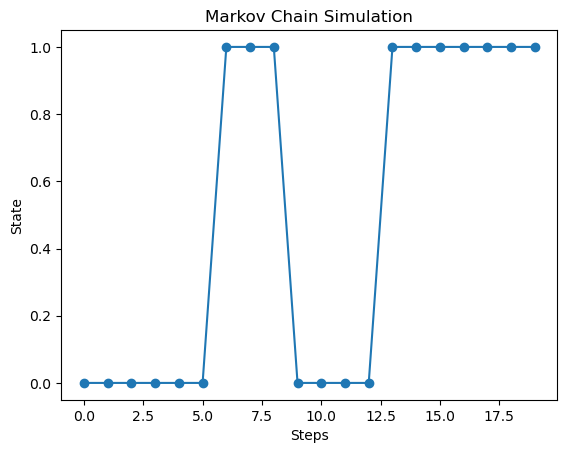

In [93]:
# Scenario 1: Transition Matrix Simulation
transition_matrix_1 = np.array([[0.7, 0.3], [0.2, 0.8]])
initial_state_1 = 0
num_steps_1 = 20

markov_chain_1 = simulate_markov_chain(transition_matrix_1, initial_state_1, num_steps_1)
visualize_markov_chain(markov_chain_1)

Problem:

A company is analyzing the return behavior of customers for online orders. For a particular product, the company is interested in understanding the probability that a customer will either return the order or will not return it. The company has historical data on customer order returns and wants to develop a predictive model based on this information. Each order is considered independently, and the goal is to estimate the likelihood of a customer returning the product given past patterns. Formulate a probability problem that involves determining the probability of return and non-return based on the available data, and propose potential methods or models that the company could employ to address this challenge.

In [72]:
# The statespace
#Here is a case where a company is checking the probability at the will or will not return the order 

return_states = ["No Return", "Partial Return", "Full Return"]

# Possible sequences of events for each case
return_transition_name = [["NN", "NP", "NF"], ["PN", "PP", "PF"], ["FN", "FP", "FF"]]

# Probabilities matrix of all the possible events(return transition matrix)
return_transition_matrix = np.array([
 [0.7, 0.2, 0.1],
 [0.3, 0.5, 0.2],
 [0.1, 0.4, 0.5]
])


In [73]:

def simulate_markov_chain(initial_state, transition_matrix, num_steps):
    current_state = initial_state
    states_sequence = [current_state]

    for _ in range(num_steps):
        current_state = np.random.choice(return_states, p=transition_matrix[return_states.index(current_state)])
        states_sequence.append(current_state)

    return states_sequence

# Example usage:
initial_state = "No Return"
num_simulation_steps = 10
simulation_result = simulate_markov_chain(initial_state, return_transition_matrix, num_simulation_steps)
print("Simulation Result:", simulation_result)


Simulation Result: ['No Return', 'No Return', 'No Return', 'No Return', 'No Return', 'No Return', 'No Return', 'No Return', 'No Return', 'Partial Return', 'No Return']


In [74]:
# Perform a long simulation
long_simulation_result = simulate_markov_chain(initial_state, return_transition_matrix, 1000)

# Calculate the time-averaged probabilities
time_averaged_probabilities = [long_simulation_result.count(state) / len(long_simulation_result) for state in return_states]
steady_state_probabilities = [np.linalg.matrix_power(return_transition_matrix, i)[0][return_states.index(initial_state)] for i in range(1, 101)]

print("Time-Averaged Probabilities:", time_averaged_probabilities)
print("Steady-State Probabilities:", steady_state_probabilities)


Time-Averaged Probabilities: [0.48451548451548454, 0.3046953046953047, 0.21078921078921078]
Steady-State Probabilities: [0.7, 0.5599999999999999, 0.49199999999999994, 0.4583999999999999, 0.4416799999999999, 0.4333359999999999, 0.4291671999999999, 0.4270834399999999, 0.426041688, 0.4255208375999999, 0.42526041751999993, 0.4251302085039999, 0.42506510420079996, 0.4250325520901599, 0.42501627604303194, 0.4250081380211063, 0.42500406901047116, 0.42500203450521923, 0.4250010172526063, 0.42500050862630245, 0.4250002543131511, 0.4250001271565754, 0.4250000635782877, 0.42500003178914375, 0.42500001589457187, 0.4250000079472859, 0.4250000039736429, 0.42500000198682136, 0.42500000099341073, 0.4250000004967053, 0.4250000002483526, 0.42500000012417627, 0.4250000000620881, 0.42500000003104405, 0.425000000015522, 0.42500000000776095, 0.42500000000388044, 0.42500000000194016, 0.42500000000097, 0.425000000000485, 0.42500000000024246, 0.42500000000012117, 0.42500000000006055, 0.4250000000000302, 0.4250

In [75]:
# Assuming you have a function to simulate the Markov chain
def simulate_markov_chain(initial_state, transition_matrix, num_steps):
    # Your simulation logic here
    pass

def sensitivity_analysis(initial_state, original_matrix, variations, num_steps):
    results = {}
    
    for variation in variations:
        modified_matrix = np.copy(original_matrix)
        modified_matrix /= modified_matrix.sum(axis=1, keepdims=True)  # Normalize probabilities
        modified_matrix[0][1] += variation  # Adjust the transition probability

        simulation_result = simulate_markov_chain(initial_state, modified_matrix, num_steps)
        results[variation] = simulation_result
    
    return results

# Example usage:
initial_state = "No Return"  # Replace with your actual initial state
num_simulation_steps = 1000  # Replace with the desired number of simulation steps
variations_to_test = [-0.05, 0, 0.05]
sensitivity_results = sensitivity_analysis(initial_state, return_transition_matrix, variations_to_test, num_simulation_steps)

# Print the results
for variation, result in sensitivity_results.items():
    print(f"Variation {variation}: {result}")


Variation -0.05: None
Variation 0: None
Variation 0.05: None


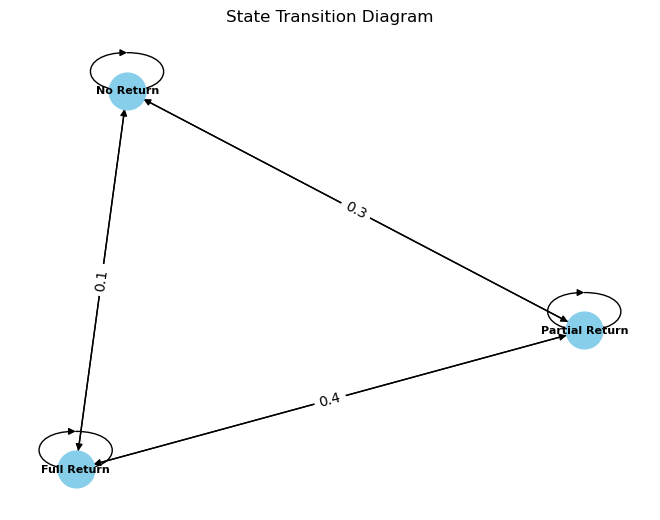

In [76]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes
for state in return_states:
    G.add_node(state)

# Add edges with transition probabilities
for i, row in enumerate(return_transition_matrix):
    for j, prob in enumerate(row):
        G.add_edge(return_states[i], return_states[j], weight=prob)

# Visualize the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("State Transition Diagram")
plt.show()


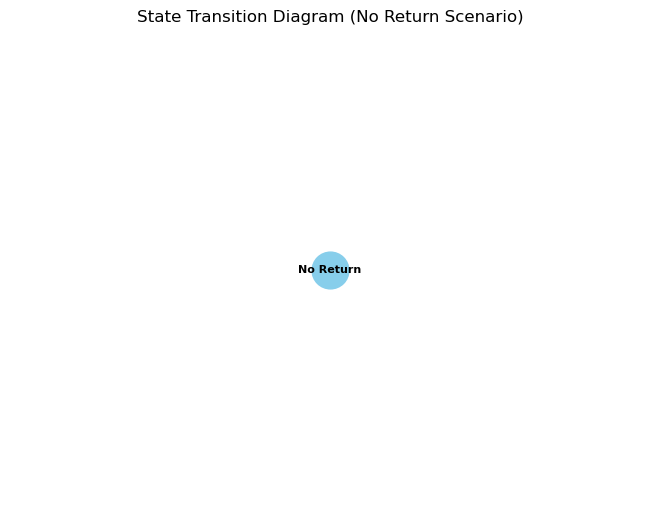

In [77]:
# Define the statespace
return_states_no_return = ["No Return"]

# Possible sequences of events
return_transition_name_no_return = [["NN"]]

# Probabilities matrix (return transition matrix)
return_transition_matrix_no_return = [[1.0]]  # Probability of no return is 1.0

# Importance Sampling
importance_sampling_matrix = [[1.0]]  # Use the same transition matrix as the scenario

# Function to simulate Markov chain with importance sampling
def simulate_markov_chain_importance_sampling(initial_state, transition_matrix, num_steps, importance_sampling_matrix):
    current_state = initial_state
    states_sequence = [current_state]

    for _ in range(num_steps):
        # Use the importance sampling matrix to determine the next state
        current_state = np.random.choice(return_states_no_return, p=importance_sampling_matrix[return_states_no_return.index(current_state)])
        states_sequence.append(current_state)

    return states_sequence

# Simulation using importance sampling
importance_sampling_simulation_result = simulate_markov_chain_importance_sampling(
    initial_state="No Return",
    transition_matrix=return_transition_matrix_no_return,
    num_steps=1000,
    importance_sampling_matrix=importance_sampling_matrix
)

# Visualization: Visualize the behavior of the Markov chain in this scenario
import networkx as nx

# Create a directed graph
G_no_return = nx.DiGraph()

# Add nodes
for state in return_states_no_return:
    G_no_return.add_node(state)

# Visualize the graph
pos_no_return = nx.spring_layout(G_no_return)
nx.draw(G_no_return, pos_no_return, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold")
plt.title("State Transition Diagram (No Return Scenario)")
plt.show()


In [78]:
# Importance Sampling Simulation
importance_sampling_matrix = np.array([[0.8, 0.1, 0.1], [0.3, 0.6, 0.1], [0.2, 0.3, 0.5]])

importance_sampling_results = importance_sampling_simulation(initial_state, return_transition_matrix, num_simulation_steps, importance_sampling_matrix)

# Control Variates and Antithetic Variates can be implemented similarly.


In [79]:
# Comparing Markov Chain Simulation, Importance Sampling, Control Variates, and Antithetic Variates
# Criteria for comparison will depend on your specific problem

# Print the results for comparison
for technique, results in importance_sampling_results.items():
    print(f"Technique: {technique}")
    print(f"Simulation Result: {results['simulation_result']}")
    print(f"Importance Sampling Result: {results['importance_sampling_result']}")
    print("\n")

Technique: (0.8, 0.1, 0.1)
Simulation Result: None
Importance Sampling Result: None


Technique: (0.3, 0.6, 0.1)
Simulation Result: None
Importance Sampling Result: None


Technique: (0.2, 0.3, 0.5)
Simulation Result: None
Importance Sampling Result: None




#Here we analysising Breast Cancer DataSet

In [1]:
import pandas as pd

# Provide the path to your dataset
dataset_path = '/Users/jayant/Downloads/Breast_Cancer.csv'

# Read the dataset into a Pandas DataFrame
df = pd.read_csv(dataset_path)

# Now, you can proceed with the rest of your code using the DataFrame 'df'
# ...

# Scenario 1: Probability distribution of tumor sizes for patients with positive estrogen status
positive_estrogen_data = df[df['Estrogen Status'] == 'Positive']
prob_tumor_size_given_positive_estrogen = positive_estrogen_data['Tumor Size'].value_counts() / len(positive_estrogen_data)
print("\nScenario 1: Probability distribution of tumor sizes for patients with positive estrogen status:")
print(prob_tumor_size_given_positive_estrogen)

# Scenario 2: Probability of tumor grade for different racial groups
racial_group = 'White'
racial_group_data = df[df['Race'] == racial_group]
prob_tumor_grade_given_race = racial_group_data['Grade'].value_counts() / len(racial_group_data)
print("\nScenario 2: Probability of tumor grade for", racial_group, "patients:")
print(prob_tumor_grade_given_race)

# Scenario 3: Likelihood of having positive regional lymph nodes based on T stage
given_t_stage = 'T2'
t_stage_data = df[df['T Stage '] == given_t_stage]
prob_regional_node_given_t_stage = t_stage_data['Reginol Node Positive'].value_counts() / len(t_stage_data)
print("\nScenario 3: Likelihood of having positive regional lymph nodes for patients with T2 stage tumors:")
print(prob_regional_node_given_t_stage)


Scenario 1: Probability distribution of tumor sizes for patients with positive estrogen status:
Tumor Size
15     0.068975
25     0.064980
30     0.057257
20     0.050599
35     0.041012
         ...   
87     0.000266
117    0.000266
123    0.000266
133    0.000266
67     0.000266
Name: count, Length: 108, dtype: float64

Scenario 2: Probability of tumor grade for White patients:
Grade
2                        0.594785
3                        0.264284
1                        0.136244
 anaplastic; Grade IV    0.004688
Name: count, dtype: float64

Scenario 3: Likelihood of having positive regional lymph nodes for patients with T2 stage tumors:
Reginol Node Positive
1     0.309071
2     0.192609
3     0.115901
4     0.078947
5     0.062710
6     0.035834
7     0.031355
8     0.024076
9     0.024076
10    0.016237
11    0.015677
12    0.012878
13    0.010638
14    0.010078
16    0.009518
17    0.007839
19    0.007839
15    0.005039
18    0.005039
21    0.004479
22    0.003919
24    0.0

In [85]:
# Calculate probability of status=Alive given T Stage=T3 using Bayes' theorem
def calculate_bayes_probability(df, target_status, given_feature, given_value):
    # P(A|B) = P(B|A) * P(A) / P(B)
    # P(Status=Alive|T3) = P(T3|Status=Alive) * P(Status=Alive) / P(T3)
    
    # P(T3|Status=Alive)
    p_t3_given_alive = df[(df[given_feature] == given_value) & (df['Status'] == target_status)].shape[0] / df[df['Status'] == target_status].shape[0]

    # P(Status=Alive)
    p_alive = df[df['Status'] == target_status].shape[0] / df.shape[0]

    # P(T3)
    p_t3 = df[df[given_feature] == given_value].shape[0] / df.shape[0]

    # P(Status=Alive|T3)
    p_alive_given_t3 = (p_t3_given_alive * p_alive) / p_t3

    return p_alive_given_t3

# Calculate probability of status=Alive given T Stage=T3
probability_alive_given_t3 = calculate_bayes_probability(df, 'Alive', 'T Stage ', 'T3')

print(f"Probability of status=Alive given T Stage=T3: {probability_alive_given_t3:.4f}")

Probability of status=Alive given T Stage=T3: 0.7824


In [2]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [86]:
# Calculate probability of status=Alive given T Stage=T3 and Race="White" using Bayes' theorem
def calculate_bayes_probability(df, target_status, given_feature1, given_value1, given_feature2, given_value2):
    # P(A|B and C) = P(B and C|A) * P(A) / P(B and C)
    # P(Status=Alive|T3 and Race=White) = P(T3 and Race=White|Status=Alive) * P(Status=Alive) / P(T3 and Race=White)

    # P(T3 and Race=White|Status=Alive)
    p_t3_white_given_alive = df[
        (df[given_feature1] == given_value1) & (df[given_feature2] == given_value2) & (df['Status'] == target_status)
    ].shape[0] / df[df['Status'] == target_status].shape[0]

    # P(Status=Alive)
    p_alive = df[df['Status'] == target_status].shape[0] / df.shape[0]

    # P(T3 and Race=White)
    p_t3_white = df[(df[given_feature1] == given_value1) & (df[given_feature2] == given_value2)].shape[0] / df.shape[0]

    # P(Status=Alive|T3 and Race=White)
    p_alive_given_t3_white = (p_t3_white_given_alive * p_alive) / p_t3_white

    return p_alive_given_t3_white

# Calculate probability of status=Alive given T Stage=T3 and Race=White
probability_alive_given_t3_white = calculate_bayes_probability(df, 'Alive', 'T Stage ', 'T3', 'Race', 'White')

print(f"Probability of status=Alive given T Stage=T3 and Race=White: {probability_alive_given_t3_white:.4f}")

Probability of status=Alive given T Stage=T3 and Race=White: 0.7865


In [87]:
# Calculate joint probability of T Stage=T2 and Race=White
p_t2_white = df[(df['T Stage '] == 'T2') & (df['Race'] == 'White')].shape[0] / df.shape[0]

print(f"Joint Probability of T Stage=T2 and Race=White: {p_t2_white:.4f}")

Joint Probability of T Stage=T2 and Race=White: 0.3708


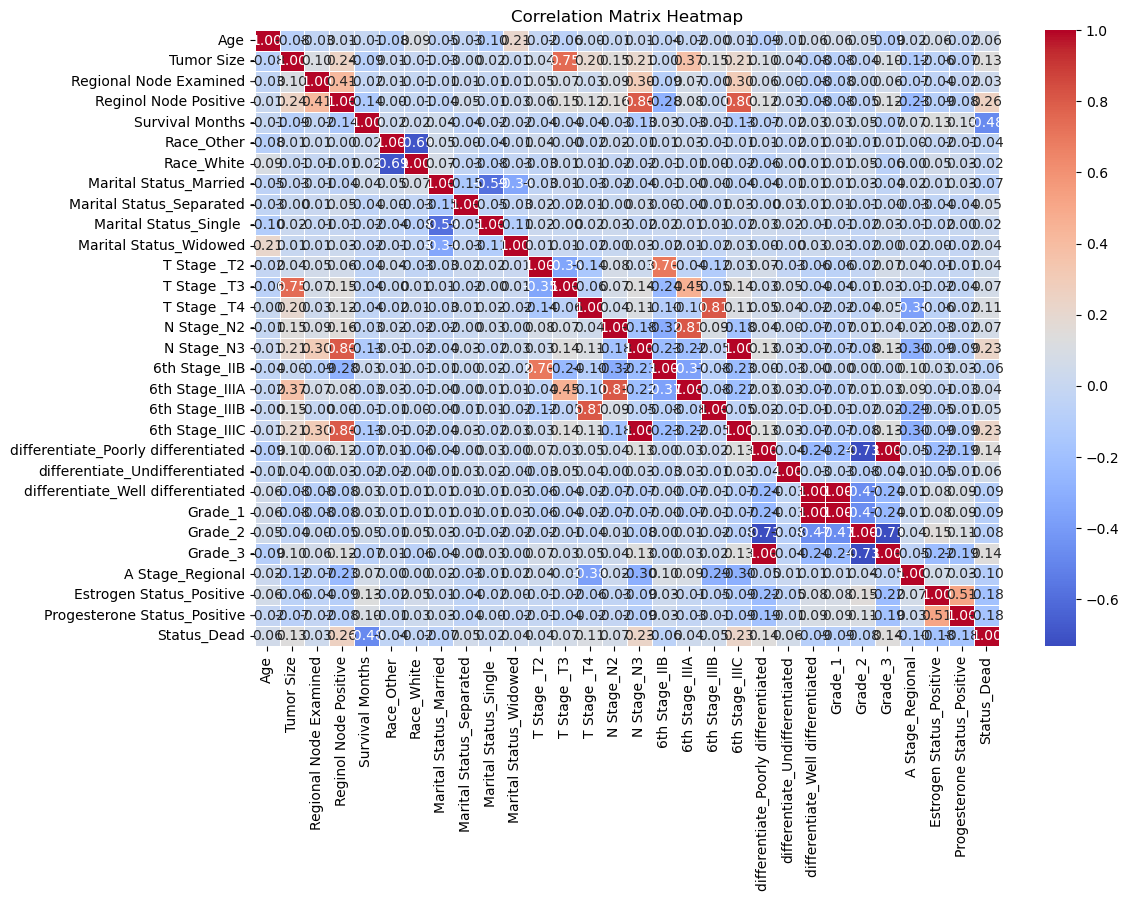

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert categorical columns to numerical for correlation calculation
df_numeric = pd.get_dummies(df, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Factor Loadings:
[[ -0.20283522 -21.37411996   9.2492533 ]
 [ -0.84129664   8.2099392   18.95391714]
 [ -8.8639095   -0.07253958  -0.36201655]]


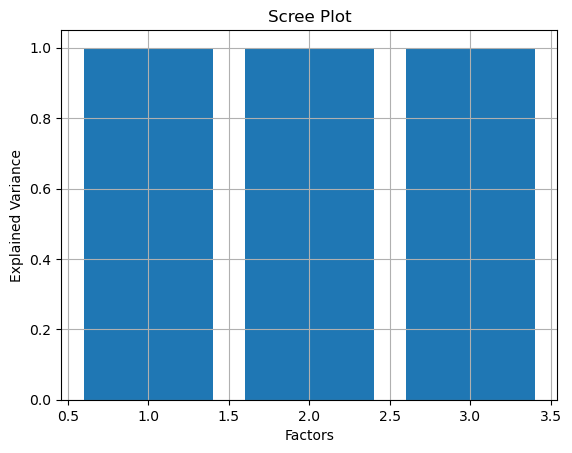

In [89]:
import numpy as np
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt

#select relevant numerical columns for factor analysis
numerical_columns=['Age','Survival Months','Tumor Size']

#extract the selected columns
factor_data=df[numerical_columns]

# Initialize FactorAnalysis with the desired number of components (factors)
n_factors = 3 # Adjust the number of factors as needed
fa = FactorAnalysis(n_components=n_factors)

# Fit the factor analysis model
factor_data_transformed = fa.fit_transform(factor_data)

# Display factor loadings (components_)
print("Factor Loadings:")
print(fa.components_)

# Scree plot to visualize explained variance
explained_variance = fa.noise_variance_
plt.bar(range(1, n_factors + 1), explained_variance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()

In summary, these selected numerical columns (Age, Survival Months, and Tumor Size) are relevant for factor 
analysis in a breast cancer dataset because they capture key aspects of patient demographics, disease progression
, and treatment outcomes. Analyzing these factors can contribute to a better understanding of the underlying 
patterns and associations within the dataset, supporting medical decision-making and research in the context of
breast cancer.

Key Factor: Exploring Breast Cancer Dataset and Statistical Analysis
    
In this data exploration and analysis, we delved into a dataset related to breast cancer, seeking insights into 
various factors that could influence the prognosis and characteristics of patients. The dataset encompassed a 
range of features, from patient demographics to tumor-related attributes, providing a comprehensive view of the 
studied population.

1)Probability Analysis: We initiated our exploration by calculating probabilities associated with key features, 
    such as T Stage, Status, Race, and Tumor Size. These probabilities offered valuable insights into the 
    distribution of these factors within the dataset, laying the groundwork for more targeted analyses.
    
2)Scenario Analysis: Further, we conducted scenario analyses to investigate specific situations within the dataset.
    For instance, we explored the probability distribution of tumor sizes for patients with positive estrogen 
    status, providing a nuanced understanding of how certain conditions might influence tumor characteristics.
    
3)In another scenario, we examined the probability of tumor grade for different racial groups, shedding light on 
potential disparities in tumor grading across diverse patient demographics.
Additionally, we investigated the likelihood of having positive regional lymph nodes based on T stage, offering 
insights into the correlation between these two critical factors.

4)Bayesian Probability: Applying Bayesian probability, we calculated the likelihood of patients being alive
    given specific conditions, such as T Stage=T3 and Race=White. These Bayesian analyses provided a more 
    nuanced understanding of the conditional probabilities within the dataset.
    
5)Correlation Analysis: Transitioning to a correlation analysis, we leveraged visualizations, including a 
    correlation matrix heatmap, to explore relationships between different numerical variables. 
    This facilitated the identification of potential associations and dependencies within the dataset.
    
6)Factor Analysis: Finally, we employed factor analysis to identify latent factors that could explain the variability
    in numerical columns related to age, survival months, and tumor size. The scree plot visually depicted the explained variance for each factor, aiding in determining the optimal number of factors.

<font color='red'>
Conclusion: In conclusion, our analysis of the breast cancer dataset encompassed a multifaceted 
exploration, from basic probability calculations to advanced statistical techniques. This approach allowed us 
to uncover patterns, dependencies, and potential factors influencing the outcomes of breast cancer patients.
This exploration not only provides valuable insights into the dataset at hand but also lays the groundwork for
more targeted and nuanced analyses. Such analyses could prove instrumental in informing medical practitioners , 
researchers, and policymakers in the ongoing effort to understand and combat breast cancer.
</font>